# MAT281 - Laboratorios N°07

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

1.- Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

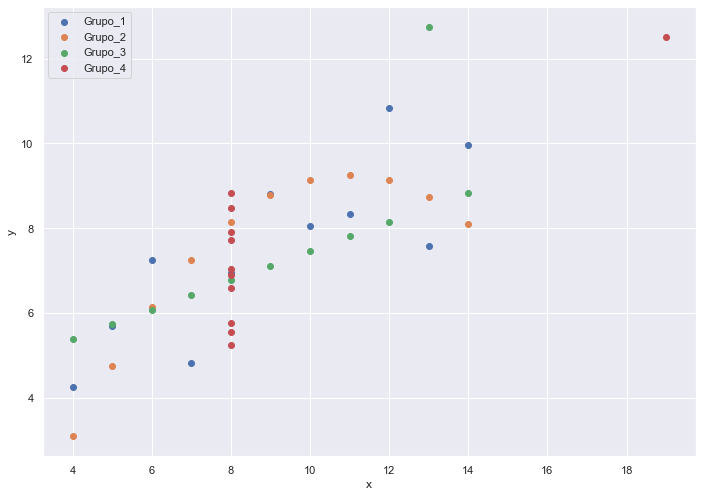

In [23]:
fig,ax = plt.subplots() #primero veamos la distribucion de todos los puntos
for i in range(1,5): #para cada fila de la tabla
    i = 'Grupo_'+str(i) #cada grupo del 1 al 4
    df_aux = df.loc[df['grupo']== i]
    x_axis = df_aux['x']
    y_axis = df_aux['y']
    ax.scatter(x_axis,y_axis,label=i)

    ax.legend()
    ax.grid()

    plt.xlabel('x')
    plt.ylabel('y')

Text(0.5, 1.0, 'Grupo 4')

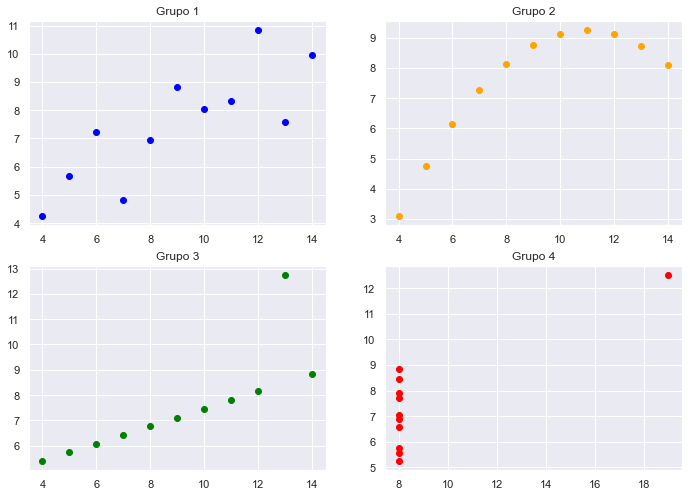

In [6]:

x1=df.loc[df['grupo']=='Grupo_1']['x']
y1=df.loc[df['grupo']=='Grupo_1']['y']
x2=df.loc[df['grupo']=='Grupo_2']['x']
y2=df.loc[df['grupo']=='Grupo_2']['y']
x3=df.loc[df['grupo']=='Grupo_3']['x']
y3=df.loc[df['grupo']=='Grupo_3']['y']
x4=df.loc[df['grupo']=='Grupo_4']['x']
y4=df.loc[df['grupo']=='Grupo_4']['y']

plt.subplot(221)
plt.scatter(x1,y1,color='blue')
plt.title('Grupo 1')

plt.subplot(222)
plt.scatter(x2,y2,color='orange')
plt.title('Grupo 2')

plt.subplot(223)
plt.scatter(x3,y3,color='green')
plt.title('Grupo 3')

plt.subplot(224)
g_y4=plt.scatter(x4,y4,color='red')
plt.title('Grupo 4')

Notemos que los gráficos son muy distintos entre sí, el azul (gráfico 1) tiene un comportamiento de zigzag, el naranja (gráfico 2) mas de parabolael verde (gráfico 3) tiene un comportamiento casi lineal, el rojo (gráfico 4) lineal paralelo al eje.

2.- Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.

In [7]:
for i in range(1,5):
    i = 'Grupo_'+str(i)
    print(i)
    print(df.loc[df['grupo']== i].describe())
    print()

Grupo_1
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000

Grupo_2
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000

Grupo_3
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000

Grupo_4
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000

Notemos que los 4 gráficos tienen medidas estadísticas muy parecidas entre si.

3.- Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

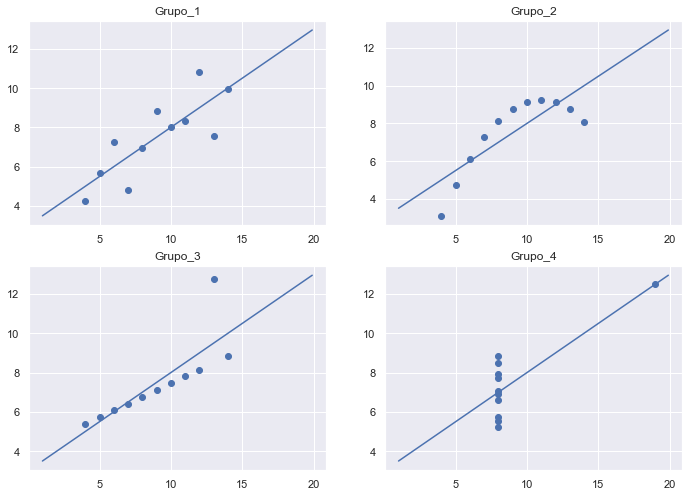

In [11]:
from sklearn.linear_model import LinearRegression

list=[[x1,y1],[x2,y2],[x3,y3],[x4,y4]]
model_rl = LinearRegression() # Creando el modelo.

for i in range(0,4):
    model_rl.fit(pd.DataFrame(list[i][0]),pd.DataFrame(list[i][1]))
    beta_0 = model_rl.intercept_
    beta_1 = model_rl.coef_[0]
    
    plt.subplot(2,2,i+1)
    plt.scatter(list[i][0],list[i][1])
    plt.title('Grupo_'+str(i+1))
    
    x_range = np.arange(1,20,0.1)
    plt.plot(x_range,beta_0+beta_1*x_range)

Notemos que el ajuste lineal es el mismo para los 4 gráficos.
1.- solo 3 puntos pasan por la recta, notemos que hay 3 puntos por encima de la recta y 3 por debajo, lo cual hace una distribución bastante "simétrica" respecto a la recta
2.- notemos que hay 2 puntos en la recta y los puntos bajo la recta tienen mayor distancia a ella que los puntos sobre ella.
3.- vemamos que el punto de mas arriba del eje y es el que altera mayormente la lineal, ya que es mucha la distancia a la recta, se podria considerar como dato "anomalo"
4.- fijemosnos que nuevamente el mayor dato del eje y es el que da la lineal, dado que los demas se podria considerar como una paralela al eje y.

4.- Calcule los resultados de las métricas para cada grupo. Interprete.

In [13]:
#grupo1
import statsmodels.api as sm

model = sm.OLS(y1, sm.add_constant(x1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Wed, 10 Nov 2021   Prob (F-statistic):            0.00217
Time:                        10:39:10   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.0

C:\Users\arisa\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [27]:
#código error para el grupo 1

! pip install metrics_regression
from metrics_regression import *

from sklearn.metrics import r2_score

lista=[]
for i in model_rl.predict(pd.DataFrame(x1)).tolist():
    lista.append(i[0])
lista

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y1,
        'yhat': lista
        }
)

df_metrics = summary_metrics(df_temp)
print('\nMetricas para el grupo 1:\n')
print(df_metrics)

ERROR: Could not find a version that satisfies the requirement metrics_regression
ERROR: No matching distribution found for metrics_regression


ModuleNotFoundError: No module named 'metrics_regression'

In [14]:
#grupo2
model = sm.OLS(y2, sm.add_constant(x2))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Wed, 10 Nov 2021   Prob (F-statistic):            0.00218
Time:                        10:39:49   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0009      1.125      2.667      0.0

C:\Users\arisa\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [33]:
# código error para el grupo 2 
from metrics_regression import *
from sklearn.metrics import r2_score

lista=[]
for i in model_rl.predict(pd.DataFrame(x2)).tolist():
    lista.append(i[0])
lista

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y2,
        'yhat': lista
        }
)

df_metrics = summary_metrics(df_temp)

print('\nMetricas para el grupo 2:\n')
print(df_metrics)

ModuleNotFoundError: No module named 'metrics_regression'

In [15]:
#grupo3
model = sm.OLS(y3, sm.add_constant(x3))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Wed, 10 Nov 2021   Prob (F-statistic):            0.00218
Time:                        10:40:10   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0025      1.124      2.670      0.0

C:\Users\arisa\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [37]:
# código error para el grupo 3 
from metrics_regression import *
from sklearn.metrics import r2_score

lista=[]
for i in model_rl.predict(pd.DataFrame(x3)).tolist():
    lista.append(i[0])
lista

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y3,
        'yhat': lista
        }
)

df_metrics = summary_metrics(df_temp)

print('\nMetricas para el grupo 1:\n')
print(df_metrics)


ModuleNotFoundError: No module named 'metrics_regression'

In [16]:
#grupo4
model = sm.OLS(y4, sm.add_constant(x4))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Wed, 10 Nov 2021   Prob (F-statistic):            0.00216
Time:                        10:40:41   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0017      1.124      2.671      0.0

C:\Users\arisa\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [39]:
#código error para el gráfico 4
from metrics_regression import *
from sklearn.metrics import r2_score

lista=[]
for i in model_rl.predict(pd.DataFrame(x4)).tolist():
    lista.append(i[0])
lista

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y4,
        'yhat': lista
        }
)

df_metrics = summary_metrics(df_temp)
print('\nMetricas para el grupo 4:\n')
print(df_metrics)

ModuleNotFoundError: No module named 'metrics_regression'

**Intepretación**



5.- Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.

In [17]:
#grupo1
from sklearn import linear_model
from sklearn.metrics import r2_score

data= df.loc[df["grupo"]=="Grupo_1"]
X = data[["x"]]
y = data[["y"]]

reg_lasso = linear_model.Ridge(alpha=.5)

reg_lasso= reg_lasso.fit(X,y)


y_pred = reg_lasso.predict(X)

r2_score(y, y_pred)

0.6665288123176956

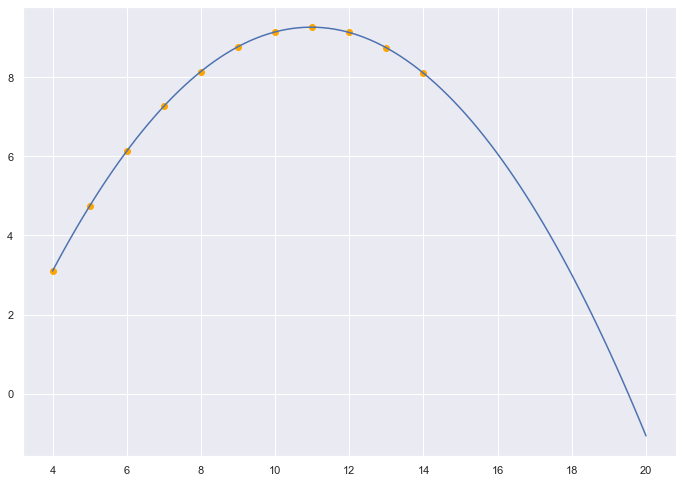

0.999999457857722

In [19]:
#grupo2
import numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

data= df.loc[df["grupo"]=="Grupo_2"]
X = data[["x"]] 
y = data[["y"]]

X = data.x 
y = data.y
mymodel = numpy.poly1d(numpy.polyfit(X, y, 2))

myline = numpy.linspace(4, 20, 100)

plt.scatter(X, y,color="orange")
plt.plot(myline, mymodel(myline))
plt.show()


r2_score(y, mymodel(X))

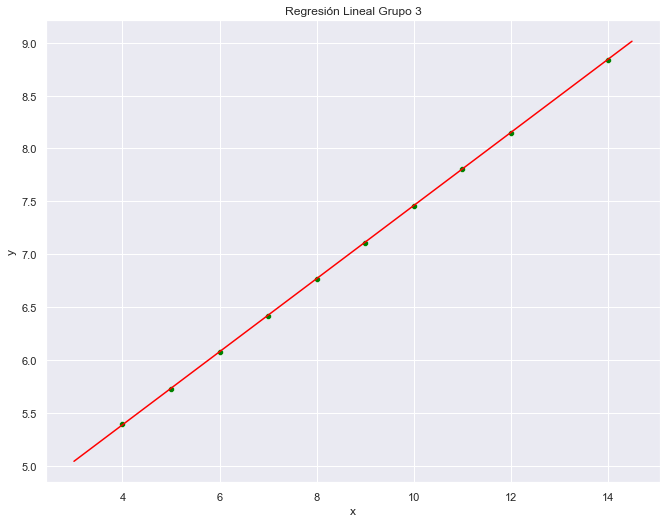

0.999993107581533

In [20]:
#grupo3

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data= df.loc[df["grupo"]=="Grupo_3"]
mask=data["y"]<12 ##elimina outlaier
data= data[mask]
X = data[["x"]]
y = data[["y"]]

model_rl = LinearRegression() # Creando el modelo.
model_rl.fit(X, y) 
# graficos con seaborn

beta_0 = model_rl.intercept_[0]
beta_1 = model_rl.coef_[0]

x_range = np.arange(3,15,0.5)

df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1[0]*n for n in x_range]})

df2 = pd.DataFrame({'x':X['x'],'y_true':y['y']})

fig, ax = plt.subplots(figsize=(11, 8.5))


sns.scatterplot(x='x', y='y_true', data=df2, ax=ax,color="green")
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.title('Regresión Lineal Grupo 3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

y_pred = model_rl.predict(X)

r2_score(y, y_pred)

In [28]:
#grupo 4
#Acá tal como el profe dijo en clases, se deben dar vuelta los ejes y sacar el "dato anómalo"